In [1]:
!pip install gdown

In [2]:
import gdown

# Replace with your Google Drive file ID
file_id = '1zLKtzmBNdhfZDwc72styCcmfKeqR-E7I'

# Construct the URL for gdown
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the model file
gdown.download(url, 'emotion_model.keras', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1zLKtzmBNdhfZDwc72styCcmfKeqR-E7I
From (redirected): https://drive.google.com/uc?export=download&id=1zLKtzmBNdhfZDwc72styCcmfKeqR-E7I&confirm=t&uuid=b9b72015-2d4b-4765-b8de-9761396aca29
To: /content/emotion_model.keras
100%|██████████| 33.5M/33.5M [00:00<00:00, 35.7MB/s]


'emotion_model.keras'

In [3]:
from tensorflow.keras.models import load_model

# Load the model
emotion_model = load_model('emotion_model.keras')

print("Model loaded successfully!")

Model loaded successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


##1.Upload the Image

Saving sad.jpg to sad.jpg
Image Path: sad.jpg


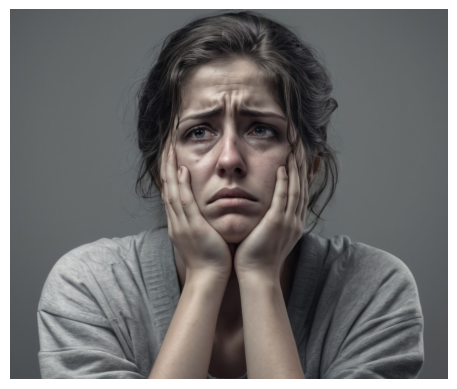

In [20]:
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image

# Upload the image
uploaded = files.upload()

# Get the uploaded image file name
image_path = list(uploaded.keys())[0]

# Save the path as a variable (it is already saved in `image_path`)
print(f"Image Path: {image_path}")

# Open the image using PIL
img = Image.open(image_path)

# Display the uploaded image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [18]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import cv2

def predict_emotion_and_show_result(image_path):
    """
    Function to predict the emotion from an image and display the result.

    Args:
        image_path: str, path to the image you want to predict
    """
    # Step 1: Open the image using PIL
    img = Image.open(image_path)

    # Display the uploaded image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

    # Step 2: Preprocess the image
    # Resize the image to the model's expected input size (48x48)
    img_resized = img.resize((48, 48))  # Adjust size based on model's expected input
    img_array = image.img_to_array(img_resized)

    # Convert to grayscale if the model expects grayscale images
    img_array = cv2.cvtColor(img_array.astype(np.uint8), cv2.COLOR_RGB2GRAY)

    # Normalize the image (optional, depending on model's training)
    img_array = img_array / 255.0

    # Add batch dimension (model expects (batch_size, height, width, channels))
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension (grayscale)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Step 3: Load the trained emotion model
    emotion_model = load_model('emotion_model.keras')  # Replace with the actual path to your model

    # Step 4: Make predictions
    predictions = emotion_model.predict(img_array)

    # Get the class with the highest confidence (assuming multiple classes)
    predicted_class = np.argmax(predictions, axis=1)

    # Define emotion labels (emotion_labels dictionary)
    emotion_labels = {
        'Anger': 0,
        'Disgust': 1,
        'Fear': 2,
        'Happy': 3,
        'Sad': 4,
        'Surprise': 5,
        'Neutral': 6
    }

    # Reverse the dictionary to map numeric labels back to emotion names
    reverse_emotion_labels = {v: k for k, v in emotion_labels.items()}

    # Get the predicted emotion name
    predicted_emotion = reverse_emotion_labels[predicted_class[0]]
    print(f"Predicted Emotion: {predicted_emotion}")

    # Step 5: Plot Image and Prediction Results
    def plot_image_and_emotion(test_image_array, pred_test_labels, image_number, emotions):
        """
        Function to plot the image and compare the prediction results with the predicted label
        Args:
            test_image_array: Array of test images (e.g., x_test_reshape_bl)
            pred_test_labels: Predictions (probabilities) from the model for each image
            image_number: The index of the image to visualize
            emotions: A dictionary that maps label numbers to emotion names (e.g., {0: 'Angry', 1: 'Disgust', ...})
        """

        # Create a subplot with 1 row and 2 columns (for the image and the bar plot)
        fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

        # Plot the test image
        # Convert the image back to a displayable format by squeezing unnecessary dimensions
        axs[0].imshow(test_image_array[0].squeeze(), cmap='gray')  # Use 'gray' for grayscale images
        axs[0].set_title(f"Predicted: {emotions[predicted_class[0]]}")

        # Plot the predicted probabilities as a bar plot
        bar_labels = list(emotions.values())  # Get the emotion names for the x-axis
        axs[1].bar(bar_labels, pred_test_labels[0], color='orange', alpha=0.7)
        axs[1].set_ylabel("Probability")
        axs[1].set_xlabel("Emotion")
        axs[1].set_title("Predicted Probabilities")
        axs[1].grid(True)

        plt.tight_layout()  # Adjust layout for better appearance
        plt.show()

    # Call the plotting function (with your test image and prediction)
    plot_image_and_emotion([img_array], predictions, 0, reverse_emotion_labels)




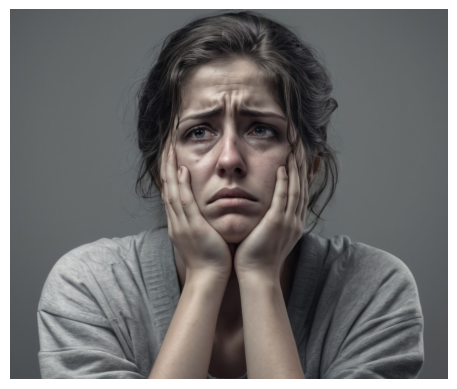

1/1 ━━━━━━━━━━━━━━━━━━━━ 37s 37s/step
Predicted Emotion: Fear


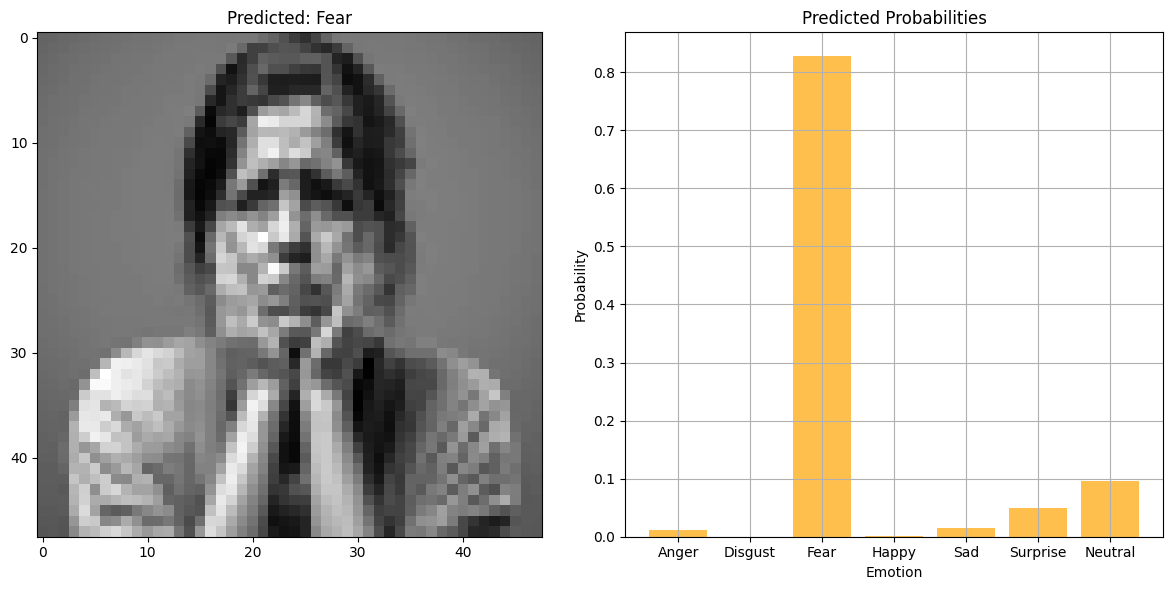

In [21]:
  # Replace with the actual image path
predict_emotion_and_show_result(image_path)